# Exploratory Data Analysis (EDA) 


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the loan dataset
loan_df = pd.read_csv("/kaggle/input/loan-dataset/loan_data.csv")

loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [43]:
# Display the number of rows and columns in the dataset
print("Number of rows and columns:", loan_df.shape)

# Display summary statistics for numerical variables
print(loan_df.describe())

Number of rows and columns: (9578, 14)
       credit.policy     int.rate  installment  log.annual.inc          dti  \
count    9578.000000  9578.000000  9578.000000     9578.000000  9578.000000   
mean        0.804970     0.122640   319.089413       10.932117    12.606679   
std         0.396245     0.026847   207.071301        0.614813     6.883970   
min         0.000000     0.060000    15.670000        7.547502     0.000000   
25%         1.000000     0.103900   163.770000       10.558414     7.212500   
50%         1.000000     0.122100   268.950000       10.928884    12.665000   
75%         1.000000     0.140700   432.762500       11.291293    17.950000   
max         1.000000     0.216400   940.140000       14.528354    29.960000   

              fico  days.with.cr.line     revol.bal   revol.util  \
count  9578.000000        9578.000000  9.578000e+03  9578.000000   
mean    710.846314        4560.767197  1.691396e+04    46.799236   
std      37.970537        2496.930377  3.3756

In [44]:
# Display the number of missing values in each column
print(loan_df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


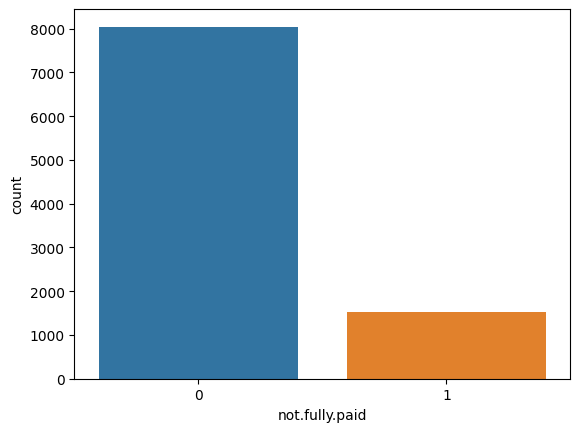

In [45]:
# Visualize the distribution of the target variable
sns.countplot(x="not.fully.paid", data=loan_df)
plt.show()

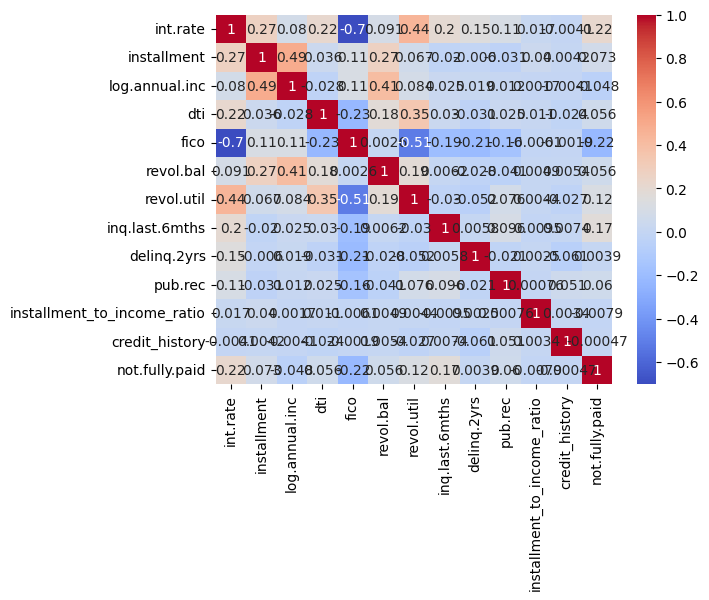

In [76]:
# Visualize the correlation between variables
corr = loan_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

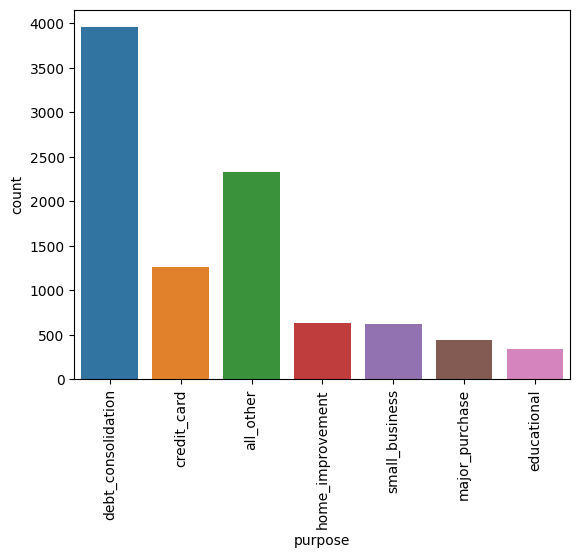

In [65]:
# Visualize the distribution of loan purpose
sns.countplot(x="purpose", data=loan_df)
plt.xticks(rotation=90)
plt.show()

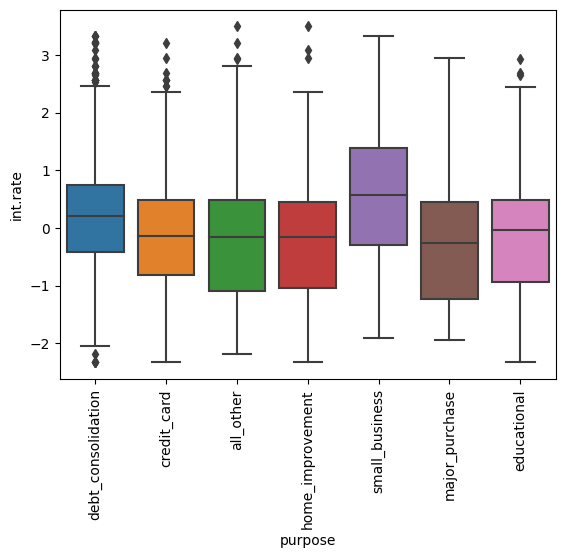

In [66]:
# Visualize the distribution of interest rates by loan purpose
sns.boxplot(x="purpose", y="int.rate", data=loan_df)
plt.xticks(rotation=90)
plt.show()

# Feature Engineering


In [67]:
# Perform feature engineering
loan_df["installment_to_income_ratio"] = (
    loan_df["installment"] / loan_df["log.annual.inc"]
)
loan_df["credit_history"] = (loan_df["delinq.2yrs"] + loan_df["pub.rec"]) / loan_df[
    "fico"
]

# Preprocessing and Balancing the Data


In [68]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Drop unnecessary columns
loan_df = loan_df.drop(['credit.policy', 'days.with.cr.line', 'purpose'], axis=1)

# Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
loan_df['not.fully.paid'] = le.fit_transform(loan_df['not.fully.paid'])

In [69]:
# Scale the numerical variables using StandardScaler
scaler = StandardScaler()
numerical_cols = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec','credit_history','installment_to_income_ratio']
loan_df[numerical_cols] = scaler.fit_transform(loan_df[numerical_cols])

In [70]:
# Handle class imbalance by oversampling the minority class
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']

X_resampled, y_resampled = sm.fit_resample(X, y)

loan_df = pd.concat([X_resampled, y_resampled], axis=1)

# Model Selection


In [71]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X = loan_df.drop('not.fully.paid', axis=1)
y = loan_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeClassifier
# Fit and evaluate decision tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classifier Accuracy: {:.2f}%".format(dt_score*100))

Decision Tree Classifier Accuracy: 81.38%


In [73]:
from sklearn.ensemble import RandomForestClassifier

# Fit and evaluate random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy: {:.2f}%".format(rf_score*100))

Random Forest Classifier Accuracy: 89.89%


In [74]:
from sklearn.linear_model import LogisticRegression

# Fit and evaluate logistic regression classifier
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print("Logistic Regression Classifier Accuracy: {:.2f}%".format(lr_score*100))

Logistic Regression Classifier Accuracy: 61.30%


In [75]:
from sklearn.svm import SVC

# Fit and evaluate support vector machine classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
print("Support Vector Machine Classifier Accuracy: {:.2f}%".format(svm_score*100))

Support Vector Machine Classifier Accuracy: 66.11%


In [78]:
# we will be saving the best model (random forest : 89% ) using joblib. 
# We are doing that because we are going to create a web app using Gradio

import joblib
# Save the best model to disk
joblib.dump(rf, 'loan_classifier.joblib')
# Save the scalar to disk
joblib.dump(scaler, 'std_scaler.bin')

['std_scaler.bin']

In [85]:
# We will create another file (app.py) to use our model that we saved in the disk using joblib
import gradio as gr
import joblib
# Load the trained model
model = joblib.load("/kaggle/input/loan-joblib/loan_classifier.joblib")


def predict_loan_status(
    int_rate,
    installment,
    log_annual_inc,
    dti,
    fico,
    revol_bal,
    revol_util,
    inq_last_6mths,
    delinq_2yrs,
    pub_rec,
    installment_to_income_ratio,
    credit_history,
):
    input_dict = {
        "int.rate": int_rate,
        "installment": installment,
        "log.annual.inc": log_annual_inc,
        "dti": dti,
        "fico": fico,
        "revol.bal": revol_bal,
        "revol.util": revol_util,
        "inq.last.6mths": inq_last_6mths,
        "delinq.2yrs": delinq_2yrs,
        "pub.rec": pub_rec,
        "installment_to_income_ratio": installment_to_income_ratio,
        "credit_history": credit_history,
    }
    # Convert the dictionary to a 2D array
    input_array = [list(input_dict.values())]
    prediction = model.predict(input_array)[0]

    if prediction == 0:
        return "Loan fully paid"
    else:
        return "Loan not fully paid"


inputs = [
    gr.Slider(0.06, 0.23, step=0.01, label="Interest Rate"),
    gr.Slider(100, 950, step=10, label="Installment"),
    gr.Slider(7, 15, step=0.1, label="Log Annual Income"),
    gr.Slider(0, 40, step=1, label="DTI Ratio"),
    gr.Slider(600, 850, step=1, label="FICO Score"),
    gr.Slider(0, 120000, step=1000, label="Revolving Balance"),
    gr.Slider(0, 120, step=1, label="Revolving Utilization"),
    gr.Slider(0, 10, step=1, label="Inquiries in Last 6 Months"),
    gr.Slider(0, 20, step=1, label="Delinquencies in Last 2 Years"),
    gr.Slider(0, 10, step=1, label="Public Records"),
    gr.Slider(0, 5, step=0.1, label="Installment to Income Ratio"),
    gr.Slider(0, 1, step=0.01, label="Credit History"),
]
outputs = [gr.Label(num_top_classes=2)]

title = "Loan Approval Classifier"
description = (
    "Enter the details of the loan applicant to check if the loan is approved or not."
)
gr.Interface(
    fn=predict_loan_status,
    inputs=inputs,
    outputs=outputs,
    title=title,
    description=description,
).launch()

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Running on local URL:  http://127.0.0.1:7861
Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on public URL: https://35bcb95a96cf5245eb.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
